<a href="https://colab.research.google.com/github/veeqtoh/Matchdaydeals_Landing/blob/master/main_v7_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMM500 - MSc Project - Sem 3
In this project, I will scrape LinkedIn for recently posted jobs and build a job recomender system and implement location filtering.


## Installing necessary dependencies


In [ ]:
#========================Install & Require Dependencies===================================
!pip install Pandas
!pip install Seaborn
!pip install Numpy
!pip install geopy
!pip install matplotlib plotly
!pip install pandas
!pip install PyPDF2
!pip install scikit-learn
!pip install scipy
!pip install tabulate
!pip install wordcloud

print("dependencies installed successfully...")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.2 MB/s eta 0:00:00
dependencies installed successfully...


## Importing required libraries


In [ ]:
#========================Install & Require================================================
#========================Scraping dependencies=========================
import csv
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta, date
import os

#========================Other dependencies=========================
from geopy.distance import geodesic
from geopy.geocoders import Nominatim, Bing
from nltk.stem import PorterStemmer
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from tabulate import tabulate
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import warnings
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import re

warnings.filterwarnings('ignore')
print("libraries imported successfully...")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


libraries imported successfully...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Defining LinkedIn links to scrape job data from


In [ ]:
#========================Links for each country to extract data analyst job listings=========================
links = {
  "usa":{
      "onsite": "https://www.linkedin.com/jobs/search/?currentJobId=3351674810&f_WT=1&geoId=103644278&keywords=data%20analyst&location=United%20States&refresh=true&start=",
      "remote": "https://www.linkedin.com/jobs/search/?currentJobId=3205250146&f_WRA=true&f_WT=2&geoId=103644278&keywords=data%20analyst&location=United%20States&refresh=true&start=",
      "hybrid": "https://www.linkedin.com/jobs/search/?currentJobId=3343518868&f_WRA=true&f_WT=3&geoId=103644278&keywords=data%20analyst&location=United%20States&refresh=true&start="
      },
  "canada":{
      "onsite": "https://www.linkedin.com/jobs/search/?currentJobId=3223346796&f_WT=1&geoId=101174742&keywords=data%20analyst&location=Canada&refresh=true&start=",
      "remote": "https://www.linkedin.com/jobs/search/?currentJobId=3335580667&f_WT=2&geoId=101174742&keywords=data%20analyst&location=Canada&refresh=true&start=",
      "hybrid": "https://www.linkedin.com/jobs/search/?currentJobId=3335356174&f_WT=3&geoId=101174742&keywords=data%20analyst&location=Canada&refresh=true&start="
      },
  "nigeria": {
      "onsite": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Nigeria&locationId=&geoId=105365761&f_TPR=&f_WT=1&position=1&pageNum=0",
      "remote": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Nigeria&locationId=&geoId=105365761&f_TPR=&f_WT=2&position=1&pageNum=0",
      "hybrid": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Nigeria&locationId=&geoId=105365761&f_TPR=&f_WT=3&position=1&pageNum=0"
      },
  "south_africa": {
      "onsite": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=South%20Africa&locationId=&geoId=104035573&f_TPR=&f_WT=1&position=1&pageNum=0",
      "remote": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=South%20Africa&locationId=&geoId=104035573&f_TPR=&f_WT=2&position=1&pageNum=0",
      "hybrid": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=South%20Africa&locationId=&geoId=104035573&f_TPR=&f_WT=3&position=1&pageNum=0"
      },
  "united_kingdom":{
      "onsite": "https://www.linkedin.com/jobs/search/?currentJobId=3643998233&f_WT=1&geoId=101165590&keywords=data%20analyst&location=United%20Kingdom&refresh=true",
      "remote": "https://www.linkedin.com/jobs/search/?currentJobId=3688656251&f_WT=2&geoId=101165590&keywords=data%20analyst&location=United%20Kingdom&refresh=true",
      "hybrid": "https://www.linkedin.com/jobs/search/?currentJobId=3664365216&f_WT=3&geoId=101165590&keywords=data%20analyst&location=United%20Kingdom&refresh=true"
      },
  "germany": {
      "onsite": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Germany&locationId=&geoId=101282230&f_TPR=&f_WT=1&position=1&pageNum=0",
      "remote": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Germany&locationId=&geoId=101282230&f_TPR=&f_WT=2&position=1&pageNum=0",
      "hybrid": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Germany&locationId=&geoId=101282230&f_TPR=&f_WT=3&position=1&pageNum=0",
      },
  "ireland": {
      "onsite": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Ireland&locationId=&geoId=104738515&f_TPR=&f_WT=1&position=1&pageNum=0",
      "remote": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Ireland&locationId=&geoId=104738515&f_TPR=&f_WT=2&position=1&pageNum=0",
      "hybrid": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Ireland&locationId=&geoId=104738515&f_TPR=&f_WT=3&position=1&pageNum=0",
      },
  "uae": {
      "onsite": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=United%20Arab%20Emirates&locationId=&geoId=104305776&f_TPR=&f_WT=1&position=1&pageNum=0",
      "remote": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=United%20Arab%20Emirates&locationId=&geoId=104305776&f_TPR=&f_WT=2&position=1&pageNum=0",
      "hybrid": "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=United%20Arab%20Emirates&locationId=&geoId=104305776&f_TPR=&f_WT=3&position=1&pageNum=0",
      },
  }
print("Links defined successfully...")

Links defined successfully...


## Scrapping job data


In [ ]:
#========================Now let's Scrape=========================
def create_job_csv(country_links: dict, country: str):
    """
    Scrapes job listings from LinkedIn using provided country links and saves them to a CSV file.

    Args:
        country_links (dict): A dictionary containing different types of job links for a specific country.
        country (str): The name of the country for which job listings are being scraped.

    Returns:
        None
    """
    try:
        # Calculate the date 14 days ago
        two_weeks_ago = datetime.now() - timedelta(days=14)

        # Set to keep track of processed job links
        processed_links = set()

        # Load processed links from existing CSV
        if os.path.exists('/content/drive/MyDrive/Final-Year-Project/Datasets/jobs/scraped/linkedin-jobs.csv'):
            with open('/content/drive/MyDrive/Final-Year-Project/Datasets/jobs/scraped/linkedin-jobs.csv', mode='r', encoding='UTF-8') as file:
                reader = csv.reader(file)
                next(reader)  # Skip header
                for row in reader:
                    processed_links.add(row[-1])  # last column is link

        # create file or open file in append mode
        with open('/content/drive/MyDrive/Final-Year-Project/Datasets/jobs/scraped/linkedin-jobs.csv', mode='a', newline='', encoding='UTF-8') as file:
            writer = csv.writer(file)

            # Only add headers if the file is empty
            if os.stat('/content/drive/MyDrive/Final-Year-Project/Datasets/jobs/scraped/linkedin-jobs.csv').st_size == 0:
                writer.writerow(['title', 'company', 'description', 'onsite_remote',
                                'salary', 'location', 'criteria', 'posted_date', 'link'])

            def linkedin_scraper(webpage, page_number, onsite_remote):
                """
                Recursive function to scrape job listings from LinkedIn.

                Args:
                    webpage (str): The base URL for job listings.
                    page_number (int): Page number to start scraping from.
                    onsite_remote (str): Type of job (onsite, remote, hybrid).

                Returns:
                    None
                """
                count = 0
                next_page = webpage + str(page_number)
                response = requests.get(str(next_page))
                soup = BeautifulSoup(response.content, 'html.parser')
                # Extracting job details
                jobs = soup.find_all(
                    'div', class_='base-card relative w-full hover:no-underline focus:no-underline base-card--link base-search-card base-search-card--link job-search-card')

                for job in jobs:
                    job_datetime = job.find(
                        'time', class_='job-search-card__listdate')
                    if job_datetime:
                        job_link = job.find('a', class_='base-card__full-link')['href']

                        if job_link not in processed_links:
                            job_date = datetime.strptime(
                                job_datetime['datetime'], '%Y-%m-%d').date()

                        if job_date >= two_weeks_ago.date():
                            job_criteria = []
                            job_title = job.find(
                                'h3', class_='base-search-card__title').text.strip()
                            job_company = job.find(
                                'h4', class_='base-search-card__subtitle').text.strip()
                            job_location = job.find(
                                'span', class_='job-search-card__location').text.strip()
                            job_datetime = job.find(
                                'time', class_='job-search-card__listdate')['datetime'] if job.find(
                                'time', class_='job-search-card__listdate') is not None else job.find(
                                'time', class_='job-search-card__listdate--new')['datetime']
                            job_salary = job.find('span', class_='job-search-card__salary-info').text.strip(
                            ) if job.find('span', class_='job-search-card__salary-info') is not None else "NaN"

                            job_link = job.find('a', class_='base-card__full-link')['href']
                            resp = requests.get(job_link)
                            sp = BeautifulSoup(resp.content, 'html.parser')

                            # Save requests as html pages to help view classes for scraping
                            if count == 0 and country == 'africa':
                                with open('templates/job_list.html', mode='w', encoding="utf-8") as job_list:
                                    job_list.write(str(response.content))
                                    job_list.close()
                                with open('templates/job.html', mode='w', encoding="utf-8") as job_detail:
                                    job_detail.write(str(resp.content))
                                    job_detail.close()
                            count += 1

                            try:
                                job_desc = sp.find('div', class_='show-more-less-html__markup show-more-less-html__markup--clamp-after-5 relative overflow-hidden').text.strip(
                                )
                            except Exception as e:
                                job_desc = "Nan"
                                print(f"An error occurred while extracting job description: {e}")

                            criteria = sp.find_all(
                                'li', class_='description__job-criteria-item')
                            for criterion in criteria:
                                feature = criterion.find(
                                    'h3', class_='description__job-criteria-subheader').text.strip()
                                value = criterion.find(
                                    'span', class_='description__job-criteria-text description__job-criteria-text--criteria').text.strip()
                                job_criteria.append({feature: value})

                            writer.writerow([job_title, job_company, job_desc, onsite_remote, job_salary,
                                            job_location, job_criteria, job_datetime, job_link])
                            print('Job Data updated')

                            processed_links.add(job_link)

                if page_number < 3500:
                    # Move to the next page
                    page_number = page_number + 25
                    linkedin_scraper(webpage, page_number, onsite_remote)

            for work_type in country_links:
                linkedin_scraper(country_links[work_type], 0, work_type)

        output_file_path = "/content/drive/MyDrive/Final-Year-Project/Datasets/jobs/scraped/linkedin-jobs.csv"
        print("LinkedIn data scrapping competed successfully and saved at:", output_file_path)

    except Exception as e:
        print(f"An error occurred: {e}")

for country in links:
    create_job_csv(links[country], country)

Streaming output truncated to the last 5000 lines.
An error occurred while extracting job description: 'NoneType' object has no attribute 'text'
Job Data updated
An error occurred while extracting job description: 'NoneType' object has no attribute 'text'
Job Data updated
Job Data updated
An error occurred while extracting job description: 'NoneType' object has no attribute 'text'
Job Data updated
An error occurred while extracting job description: 'NoneType' object has no attribute 'text'
Job Data updated
An error occurred while extracting job description: 'NoneType' object has no attribute 'text'
Job Data updated
An error occurred while extracting job description: 'NoneType' object has no attribute 'text'
Job Data updated
An error occurred while extracting job description: 'NoneType' object has no attribute 'text'
Job Data updated
An error occurred while extracting job description: 'NoneType' object has no attribute 'text'
Job Data updated
Job Data updated
An error occurred while ext

## Skills Database
We will be implementing dictionary based skill extraction

In [ ]:
#========================Setting up skills Database================================================

Skills_DB = [
    'Python', 'R', 'SQL', 'Machine Learning', 'Data Cleaning', 'Data Wrangling', 'Data Visualization', 'Statistical Analysis',
    'Predictive Modeling', 'Supervised Learning', 'Unsupervised Learning', 'Deep Learning', 'Natural Language Processing',
    'Time Series Analysis', 'Data Mining', 'Big Data', 'Hadoop', 'Spark', 'Data Engineering', 'Data Warehousing', 'Cloud Computing',
    'Tableau', 'Power BI', 'Data Analytics', 'Data Exploration', 'Data Preprocessing', 'Data Transformation', 'Data Munging',
    'Data Integration', 'Data Governance', 'Data Quality Management', 'Data Privacy', 'Data Security', 'Data Ethics', 'Data Architecture',
    'Data Modeling', 'Data Pipelines', 'Pandas', 'Matplotlib', 'Scikit-learn', 'TensorFlow', 'Keras', 'NLTK', 'Data Analysis',
    'Data Interpretation', 'Data Communication', 'Data Reporting', 'Data Collaboration', 'Data Strategy', 'Data Planning', 'Data Audit',
    'Data Stewardship', 'Data Compliance', 'Data Governance Frameworks', 'Data Privacy Policies', 'Data Protection', 'Data Resilience',
    'Data Storage Solutions', 'Data Transfer', 'Data Backup', 'Data Archiving', 'Data Recovery', 'Data Disposal', 'Data Storytelling',
    'A/B Testing', 'Experimental Design', 'Sentiment Analysis', 'Data Cataloging', 'Data Lineage', 'Data Profiling', 'DataOps',
    'Model Deployment', 'Model Monitoring', 'Data Regulations', 'Data Bias Mitigation', 'Data Transparency', 'Data Accountability',
    'Data Risk Assessment', 'Data Training', 'Data Literacy', 'Data-driven Decision Making', 'Data Awareness',
    'Data Visualization Best Practices', 'Database Management', 'Data Cleansing', 'Data Indexing', 'Data Querying', 'Data Monitoring',
    'Data Shaping', 'Data Merging', 'Data Segmentation', 'Data Clustering', 'Data Forecasting', 'Data Ingestion', 'Data Aggregation',
    'Data ETL', 'Data Validation', 'Data Normalization', 'Data Discretization', 'Data Interpolation', 'Data Sampling', 'Data Splitting',
    'Data Dashboards', 'Data Performance Metrics', 'Data Similarity Measures', 'Data Outlier Detection', 'Data Feature Selection',
    'Data Pattern Recognition', 'Data Recommendation', 'Data Labeling', 'Data Fairness Assessment', 'Data Privacy Protection',
    'Data Security Measures', 'Data Recovery Methods', 'Data Quality Assessment', 'Data Feedback', 'Data Planning', 'Data Policy Management',
    'Data Documentation', 'Data Access Control', 'Data Ownership', 'Data Consent Management', 'Data Regulation Compliance', 'Data Culture',
    'Data Governance Frameworks', 'Data Strategy Frameworks', 'Data Protection', 'Data Resilience', 'Data Transfer', 'Data Backup',
    'Data Archiving', 'Data Recovery', 'Data Disposal', 'Blockchain', 'Internet of Things (IoT)', 'Business Intelligence (BI)',
    'Data Monetization', 'Data Streaming', 'Reinforcement Learning', 'Data Ethics', 'Data Storytelling', 'Network Analysis', 'Web Scraping',
    'Graph Databases', 'DevOps', 'Version Control', 'Data Fusion', 'Data Deduplication', 'Data Wrangling', 'Data Anonymization',
    'Data Masking', 'Data Encryption', 'Data Loss Prevention', 'Data Inference', 'Data Correlation', 'Data Regression', 'Data Categorization', 'Data Bias Detection',
    'Transfer Learning', 'Gaussian Processes', 'Survival Analysis', 'Bayesian Methods', 'Recommender Systems', 'Evolutionary Algorithms', 'Quantum Computing', 'Augmented Reality', 'Virtual Reality', 'Computer Vision',
    'Time Series Forecasting', 'Automated Machine Learning', 'Federated Learning', 'Causal Inference', 'Text Generation', 'Knowledge Graphs',
    'Explainable AI', 'Fairness in AI', 'Capacity of M&E', 'Compliance', 'Project MIS Architecture', 'Interpret Statistical Analysis'
]

def extract_skills(input_text):
    """
    Extracts skills from the given input text and returns a set of found skills.

    Parameters:
        input_text (str): The text from which skills are to be extracted.

    Returns:
        set: A set containing the found skills from the input text.

    Note:
        This function utilizes a predefined set of skills, Skills_DB, and compares tokens and n-grams
        in the input text with Skills_DB to identify and extract skills. The function performs
        case-insensitive matching for tokens and case-sensitive matching for "R" to distinguish
        between the letter 'r' and the programming language "R". Common phrases that are not skills
        are removed before the skill extraction process.
    """
    stop_words = set(nltk.corpus.stopwords.words('english'))
    word_tokens = nltk.tokenize.word_tokenize(input_text)

    # Create a set to keep the results in.
    found_skills = set()

    # Variable to track if "R" is found as "R" (case-sensitive)
    found_big_r = False

    # Check if each token is in the data analyst skills list (case-insensitive matching)
    for token in word_tokens:
        if token.lower() == "r":
            # Check for exact match for "R" (case-sensitive)
            if token == "R":
                found_skills.add(token.lower())
                found_big_r = True
        elif token.lower() in Skills_DB:
            found_skills.add(token.lower())

    # Check bigrams and trigrams (case-insensitive matching)
    for ngram in nltk.everygrams(word_tokens, 2, 3):
        ngram_str = ' '.join(ngram).lower()
        if ngram_str in Skills_DB:
            found_skills.add(ngram_str)

    # Remove common phrases that are not skills
    text_combined = ' '.join(word_tokens).lower()
    text_combined = re.sub(r'\b(?:Position Title|Reports to|UNIT|GROUP|GROUP:|Essential Duties And Responsibilities|QUALIFICATIONS AND BACKGROUND:|Education|Experience|KNOWLEDGE, SKILLS, AND ABILITIES:|Other)\b', '', text_combined)

    # Check for skills in the cleaned text
    for skill in Skills_DB:
        if skill.lower() in text_combined:
            found_skills.add(skill.lower())

    # Check if "R" is not found as "R" (case-sensitive), then remove "r"
    if not found_big_r:
        found_skills.discard("r")

    return found_skills

# Test the function with "R" recognition
test_text = "Python, r, R, SQL, Data Wrangling"
skills_found = extract_skills(test_text)
print(skills_found)

{'sql', 'data wrangling', 'python', 'r'}


## Loading the Dataset
I will load the dataset, and preprocess it to meet some criteria. The last proprocessing will be converting the location data into longitude and latitude values as against having them as text as we originally do in the dataset. This way, its easy to calculate the distance for recommendation.

It is also important I do this here so that I'm not converting at the point of recommendation.

In [ ]:
# Load the jobs dataset
jobs_df = pd.read_csv("/content/drive/MyDrive/Final-Year-Project/Datasets/jobs/updated_jobs_dataset.csv", encoding="ISO-8859-1")
job_descriptions = jobs_df["description"].fillna("")
print("Jobs dataset imported successfully...")

num_rows = jobs_df.shape[0]
print(f"\nNumber of Rows in the Preprocessed Dataset: {num_rows}")

unique_locations_count = jobs_df["location"].nunique()
print(f"Count of Unique Locations: {unique_locations_count}")

Jobs dataset imported successfully...

Number of Rows in the Preprocessed Dataset: 15957
Count of Unique Locations: 204


## Preprocessing the dataset
I will preprocess the loaded dataset according to the following rules;

1. Remove rows with empty or "Nan" “title” column
2. 'description' column cannot be empty or nan or null as this is where the job descriptions will reside. It also houses required skills information
3. 'remote_onsite' has three possible values - remote, onsite and hybrid respectively.
3. 'location' must not be empty, nan or null and must not be a hyperlink. This is pivotal to our conversion into long and lat
4. Remove rows with poorly formatted “location” column -- location cannot be number -- cannot be blank -- cannot be a url -- must be text





In [ ]:
# Step 1: Remove rows where the description is empty, nan, or null
jobs_df = jobs_df.dropna(subset=["description"])

num_rows = jobs_df.shape[0]
print(f"\nNumber of Rows in the Preprocessed Dataset after step 1: {num_rows}")

# Step 2: Remove rows with invalid values in the 'onsite_remote' column
valid_onsite_remote = ['remote', 'onsite', 'hybrid']
jobs_df = jobs_df[jobs_df['onsite_remote'].isin(valid_onsite_remote)]

num_rows = jobs_df.shape[0]
print(f"\nNumber of Rows in the Preprocessed Dataset after step 2: {num_rows}")

# Step 3: Remove rows where location is empty, nan, null, or a hyperlink
def is_hyperlink(text):
    """
    Check if the text is a hyperlink.

    Parameters:
        text (str): The text text to be checked.

    Returns:
        bool: True if the text is a hyperlink (starts with "http" or "www"), False otherwise.

    Raises:
        None.
    """
    return text.startswith("http") or text.startswith("www")

def is_nan(text):
    """
    Check if the text is Nan.

    Parameters:
        text (str): The text text to be checked.

    Returns:
        bool: True if the text is a Nan (starts with "Nan" or "None"), False otherwise.

    Raises:
        None.
    """
    return text.startswith("Nan") or text.startswith("None")

jobs_df = jobs_df.drop(jobs_df[jobs_df['description'].apply(is_hyperlink)].index)
num_rows = jobs_df.shape[0]
print(f"\nNumber of Rows in the Preprocessed Dataset after step 3: {num_rows}")

jobs_df = jobs_df.drop(jobs_df[jobs_df['description'].apply(is_nan)].index)
num_rows = jobs_df.shape[0]
print(f"\nNumber of Rows in the Preprocessed Dataset after step 4: {num_rows}")

jobs_df = jobs_df.drop(jobs_df[jobs_df['title'].apply(is_hyperlink)].index)
num_rows = jobs_df.shape[0]
print(f"\nNumber of Rows in the Preprocessed Dataset after step 5: {num_rows}")

jobs_df = jobs_df.drop(jobs_df[jobs_df['location'].apply(is_hyperlink)].index)
num_rows = jobs_df.shape[0]
print(f"\nNumber of Rows in the Preprocessed Dataset after step 6: {num_rows}")

# Step 4: Convert location text to latitude and longitude using batch geocoding

def batch_geocode(location_texts):
    """
    Batch geocodes a list of location texts using the Bing Maps API.

    Args:
        location_texts (list[str]): A list of location texts to be geocoded.

    Returns:
        list[tuple]: A list of tuples containing latitude and longitude values for each geocoded location.
                     If a location cannot be geocoded, the tuple will contain (None, None).

    Example:
        >>> locations = batch_geocode(['New York, USA', 'London, UK', 'Paris, France'])
        >>> print(locations)
        [(40.712776, -74.005974), (51.507351, -0.127758), (48.856613, 2.352222)]
    """
    geolocator = Bing(api_key='ApP-_G6oKOM-Q3YBe5kI19R41ixo4ZGwrv48pETwKWRkjlMa5vZmZFFjPnj6dcke')
    locations = [geolocator.geocode(location_text) for location_text in location_texts]
    return [(location.latitude, location.longitude) if location else (None, None) for location in locations]

locations = jobs_df["location"].tolist()
batch_results = batch_geocode(locations)
jobs_df["latitude"], jobs_df["longitude"] = zip(*batch_results)

# Filter out rows where the geocoding was unsuccessful
jobs_df = jobs_df.dropna(subset=["latitude", "longitude"])

# Count and print the number of rows in the preprocessed dataset
num_rows = jobs_df.shape[0]
print(f"Step 4 - Number of Rows in the Preprocessed Dataset: {num_rows}")

unique_locations_count = jobs_df["location"].nunique()
print(f"Count of Unique Locations: {unique_locations_count}")

# Removing duplicate jobs
duplicate_links = jobs_df[jobs_df['link'].duplicated(keep='first')]
jobs_df = jobs_df.drop(duplicate_links.index)

num_rows = jobs_df.shape[0]
print(f"\nNumber of Rows in the Preprocessed Dataset after removing duplicates: {num_rows}")

# Call the extract_skills function and get the required skills
jobs_df["required_skills"] = jobs_df["description"].apply(extract_skills)
print("Skills extracted successfully...")

# Save the updated dataset to a new file in the same location
output_file_path = "/content/drive/MyDrive/Final-Year-Project/Datasets/jobs/updated_jobs_dataset.csv"
jobs_df.to_csv(output_file_path, index=False)

print("Jobs dataset updated and saved successfully at:", output_file_path)

# Print the top 10 rows
print(tabulate(jobs_df.head(10), headers='keys', tablefmt='grid'))


Number of Rows in the Preprocessed Dataset after step 1: 15957

Number of Rows in the Preprocessed Dataset after step 2: 15957

Number of Rows in the Preprocessed Dataset after step 3: 15957

Number of Rows in the Preprocessed Dataset after step 4: 15957

Number of Rows in the Preprocessed Dataset after step 5: 15957

Number of Rows in the Preprocessed Dataset after step 6: 15957


KeyboardInterrupt: ignored

## Exploring the Preprocessed dataset (EDA)
To explore and visualize the geographic distribution of jobs, I am using matplotlib for creating static plots and plotty for interactive plots.

With 169 unique locations, visualizing the geographic distribution of jobs using a pie chart might become overwhelming and less informative. For a more effective exploration and visualization of the data, I am using Choropleth Map and Clustered Bar Chart or Histogram. I also created an Interactive Map using plotty

#### Choropleth Map
Choropleth map using the plotly library.

In [ ]:
#=======================EDA================================================

# Group jobs by location text and count the number of jobs in each location
jobs_by_location = jobs_df["location"].value_counts().reset_index()
jobs_by_location.columns = ["location", "job_count"]

# Create a choropleth map
fig = px.choropleth(
    jobs_by_location,
    locationmode="country names",  # Set the location mode to "country names" for better matching of countries
    locations="location",
    color="job_count",
    hover_name="location",
    projection="natural earth",
    title="Geographic Distribution of Jobs",
)

# Show the interactive choropleth map
fig.show()

#### Clustered Bar Chart
Clustered bar chart using matplotlib

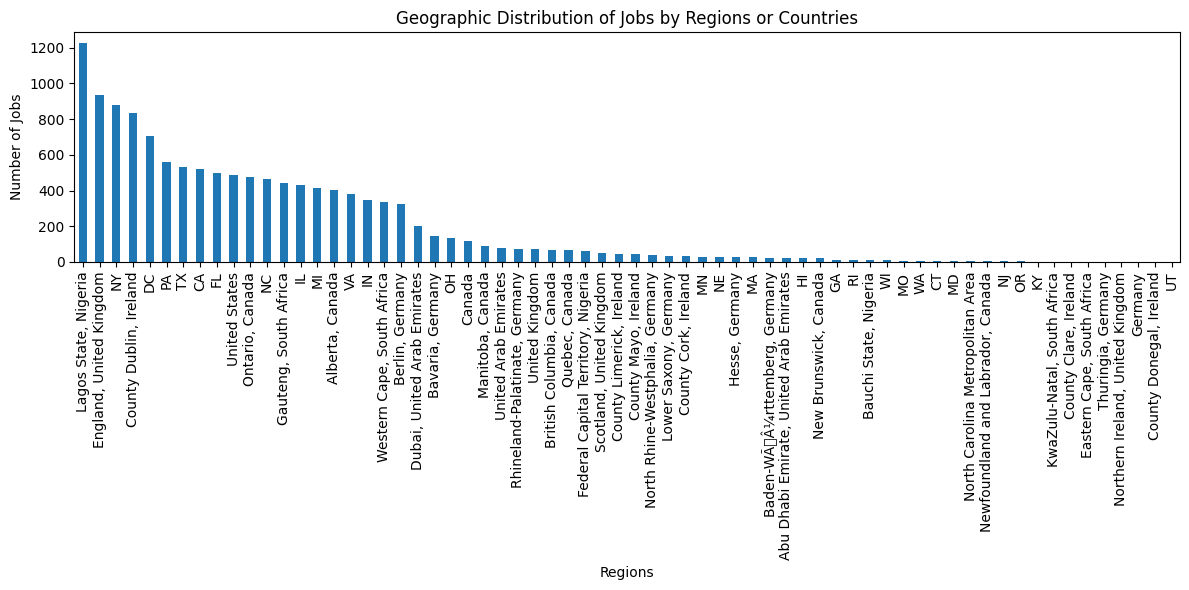

In [ ]:
#========================EDA================================================

# Group jobs by broader regions or countries
jobs_by_country = jobs_df["location"].str.extract(r',\s*(\D+)$').squeeze()  # Extract country names
jobs_by_country_counts = jobs_by_country.value_counts()

# Plot the clustered bar chart
plt.figure(figsize=(12, 6))
jobs_by_country_counts.plot(kind="bar")
plt.xlabel("Regions")
plt.ylabel("Number of Jobs")
plt.title("Geographic Distribution of Jobs by Regions or Countries")
plt.tight_layout()
plt.show()


#### Interactive map
Interactive Map using plotly

## Exploring the Jobs Descriptions

### Plotting Dense Words in the Job descriptions
Let's explore the top 20 skills in the jobs dataset

Top 20 Skills in demand:
': 131168
a: 119435
 : 86670
t: 62296
i: 50870
,: 50543
n: 48813
s: 42892
l: 42318
e: 32929
d: 32605
o: 23822
y: 19567
r: 19170
p: 16658
c: 15834
{: 15041
}: 15041
g: 14010
u: 12390


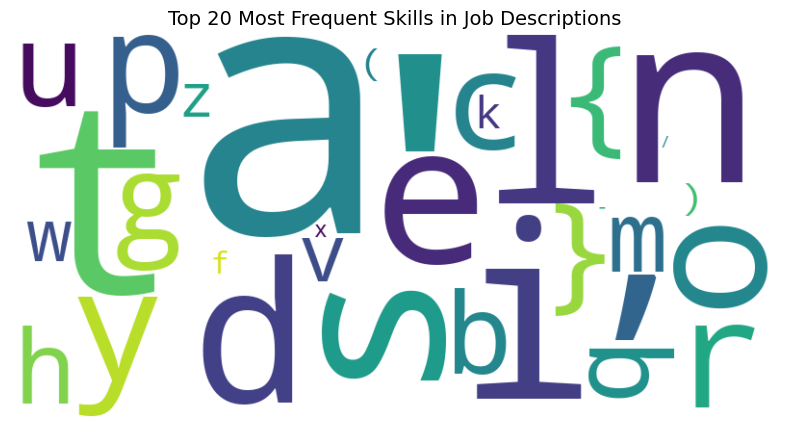

In [ ]:
#========================EDA================================================

from wordcloud import WordCloud
from collections import Counter

# Combine all the extracted skills into a single list
all_skills = [skill for skills_list in jobs_df["required_skills"] for skill in skills_list]

# Count the occurrences of each skill
skill_counts = Counter(all_skills)

# Get the top 20 most frequent skills
top_20_skills = skill_counts.most_common(20)

# Print the top 20 skills
print("Top 20 Skills in demand:")
for skill, count in top_20_skills:
    print(f"{skill}: {count}")

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Most Frequent Skills in Job Descriptions', fontsize=14)
plt.show()

In [ ]:
#========================EDA================================================

# Plot the geographic distribution of jobs using an interactive map
fig = px.scatter_mapbox(
    jobs_df,
    lat="latitude",
    lon="longitude",
    hover_name="title",
    hover_data=["company", "location"],
    zoom=3,)

# Customize the map layout
fig.update_layout(
    mapbox_style="open-street-map",
    title="Geographic Distribution of Jobs",
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
)

# Show the interactive map
fig.show()

## Load and process CV

Job seeker data imported successfully...
User's Location: New York
CV preprocessed successfully...
Job seeker data extracted successfully...
Found Skills:
python
--------------------------------------------------
sql
--------------------------------------------------
statistical analysis
--------------------------------------------------
r
--------------------------------------------------
version control
--------------------------------------------------
Plotting Word Clound for Foun skills in CV...


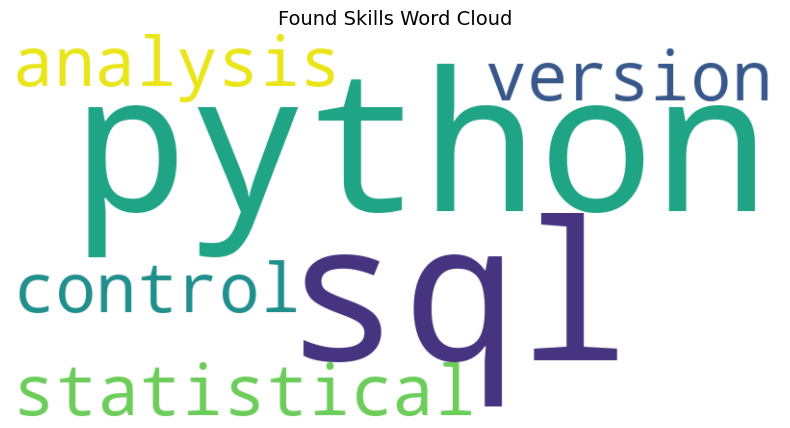

In [ ]:
#========================Preparing the job seeker data================================================

# Load job seeker data (including preferred location) in PDF format
cv_file_path = "/content/drive/MyDrive/Final-Year-Project/Datasets/cvs/cv2.pdf"
job_seeker_data = {}
print("Job seeker data imported successfully...")

# Extract text from the PDF CV
with open(cv_file_path, 'rb') as cv_file:
    pdf_reader = PdfReader(cv_file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()

    # Fill job_seeker_data dictionary with extracted information
    # Assuming that the CV contains "skills" and "location_text" fields
    job_seeker_data["cv"] = " ".join(text.split())  # Join text lines and remove extra spaces
    job_seeker_data["location_text"] = "New York"  # To be replaced with job seeker's location text
    # Add more job seeker attributes as needed

    # Check if the location exists in the jobs dataframe
    location_text = job_seeker_data["location_text"]
    matching_locations = jobs_df[jobs_df["location"] == location_text]

    if not matching_locations.empty:
        # If a matching location is found in the jobs dataframe, use its latitude and longitude
        job_seeker_data["location"] = (matching_locations.iloc[0]["latitude"], matching_locations.iloc[0]["longitude"])
    else:
        # If no match is found, use Nominatim geocoding service to get latitude and longitude
        geolocator = Nominatim(user_agent="job_seeker_locator")
        location = geolocator.geocode(location_text)
        if location:
            job_seeker_data["location"] = (location.latitude, location.longitude)
        else:
            print("Geocoding failed for the user's location. Please check the location text.")

    # Print the user's location text
    print("User's Location:", job_seeker_data["location_text"])
    print("CV preprocessed successfully...")

print("Job seeker data extracted successfully...")

# Call the extract_skills function and get the found skills
job_seeker_data["found_skills"] = extract_skills(job_seeker_data["cv"])

# Convert the set of skills to a single string
job_seeker_data["skill_set"] = ' '.join(job_seeker_data["found_skills"])

# Print the found skills
print("Found Skills:")
for skill in job_seeker_data["found_skills"]:
    print(skill)
    print("-" * 50)

print("Plotting Word Clound for Foun skills in CV...")
# Generate the word cloud for the found skills
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_seeker_data["skill_set"])

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Found Skills Word Cloud', fontsize=14)
plt.show()

## Recommender engine
Here, we define functions to use Deep learning technics such as Stemming with Porter Stemmer TF-IFD, and cosine Similarity to implement a location-filtering based job recommeder system

In [ ]:
#========================Job Reccomender System================================================

import pandas as pd
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
from PyPDF2 import PdfReader

# Initialize the NLTK stemmer
stemmer = PorterStemmer()

def stem_text(text):
    """
    Perform stemming on a given text using the Porter Stemmer algorithm.

    Parameters:
        text (str): The input text to be stemmed.

    Returns:
        str: The stemmed text with words reduced to their root forms.

    Example:
        >>> text = "I love running and runners run fast."
        >>> stemmed_text = stem_text(text)
        >>> print(stemmed_text)
        "I love run and runner run fast."
    """
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def recommend_jobs(skills, job_seeker_location, jobs_df, top_n=5, max_distance_km=50.0):
    """
      Recommend jobs to a job seeker based on their skills and preferred location.

      The function uses cosine similarity to compare the job seeker's skills with the required skills for each job.
      Jobs are recommended if at least one skill matches between the job's required skills and the job seeker's skills.

      Parameters:
          skills (list of str): List of skills possessed by the job seeker.
          job_seeker_location (tuple): Tuple containing the latitude and longitude of the job seeker's preferred location.
          jobs_df (pandas.DataFrame): DataFrame containing job data with columns:
                                      'title', 'required_skills', 'latitude', 'longitude', 'company', 'link', 'description', 'location'.
          top_n (int, optional): The maximum number of recommended jobs to return. Defaults to 5.
          max_distance_km (float, optional): The maximum distance (in kilometers) from the job seeker's location
                                            within which jobs will be recommended. Defaults to 50.0.

      Returns:
          list: A list of tuples containing recommended job information, sorted by distance from the job seeker's location.
                Each tuple contains (job_title, similarity_score, company_name, job_link, job_description, distance_km).

      Example:
          >>> skills = ['python', 'sql', 'machine learning']
          >>> job_seeker_location = (40.7128, -74.0060)  # New York City latitude and longitude
          >>> recommended_jobs = recommend_jobs(skills, job_seeker_location, jobs_df, top_n=10, max_distance_km=50.0)
          >>> for job_title, similarity_score, company_name, job_link, job_description, distance_km in recommended_jobs:
          >>>     print(f"Job Title: {job_title}")
          >>>     print(f"Company: {company_name}")
          >>>     print(f"Location: {job_seeker_location}")
          >>>     print(f"Link: {job_link}")
          >>>     print(f"Description: {job_description}")
          >>>     print(f"Similarity Score: {similarity_score}")
          >>>     print(f"Distance (km): {distance_km:.2f}")
          >>>     print("-" * 50)
    """
    # Create a list to store job recommendations and their corresponding scores
    job_recommendations = []
    print("Recommending.. Please wait..")

    # Convert the job_seeker_skills to a set for comparison
    job_seeker_skill_set = set(skills)

    job_seeker_latitude, job_seeker_longitude = job_seeker_location

    recommended_job_titles = set()

    # Check if the job_seeker_skill_set is not empty before calculating the similarity score
    if job_seeker_skill_set:
        for idx, row in jobs_df.iterrows():
            job_title = row['title']
            job_location = (row['latitude'], row['longitude'])
            company_name = row['company']
            job_link = row['link']
            job_description = row['description']

            # Convert the job's required_skills to a set for comparison
            required_skill_set = set(row['required_skills'])

            # Calculate the number of matching skills
            num_matching_skills = len(job_seeker_skill_set.intersection(required_skill_set))

            # Calculate the Jaccard similarity coefficient
            similarity_score = num_matching_skills / len(job_seeker_skill_set.union(required_skill_set))

            # Exclude jobs with similarity score of 0.0
            if similarity_score > 0.0:
                distance_km = geodesic(job_location, (job_seeker_latitude, job_seeker_longitude)).kilometers

                if distance_km <= max_distance_km and job_title not in recommended_job_titles:
                    job_recommendations.append((job_title, similarity_score, company_name, job_link, job_description, distance_km))
                    recommended_job_titles.add(job_title)

    # Sort the job recommendations based on similarity score (descending) and distance (ascending)
    job_recommendations.sort(key=lambda x: (-x[1], x[5]))

    # Get the top N recommended jobs (up to a maximum of 10)
    top_jobs = job_recommendations[:min(top_n, len(job_recommendations))]

    return top_jobs


### Let's Recommend!
It's time. In this Cell, we'd run the recommendation engine to recommend jobs for the proceesed CV

In [ ]:
#========================Time to Recommend Jobs!================================================

# Get job recommendations for the job seeker based on their skills and preferred location
recommended_jobs = recommend_jobs(job_seeker_data["found_skills"], job_seeker_data["location"], jobs_df, top_n=10, max_distance_km=50.0)

# Print the recommended jobs with company name, link, and description
if not recommended_jobs:
    print("No jobs fitting your profile at this time. Please check back later.")
else:
    print("Recommended Jobs:")
    for job_title, similarity_score, company_name, job_link, job_description, distance_km in recommended_jobs:
        print(f"Job Title: {job_title}")
        print(f"Company: {company_name}")
        # Print the location text from the jobs_df for the current recommended job
        job_location_text = jobs_df[jobs_df['title'] == job_title]['location'].values[0]
        print(f"Location: {job_location_text}")
        print(f"Link: {job_link}")
        print(f"Description: {job_description}")
        print(f"Similarity Score: {similarity_score}")
        print("-" * 50)


Recommending.. Please wait..
Recommended Jobs:
Job Title: Clinical Data Analyst
Company: TrialSpark
Location: Greater Dublin
Link: https://www.linkedin.com/jobs/view/clinical-data-analyst-at-trialspark-3690684843?refId=bpChK9l0WFy9I6yA8kCXGw%3D%3D&trackingId=E3z4hS0bMqlsNNztsfIGhw%3D%3D&position=21&pageNum=0&trk=public_jobs_jserp-result_search-card
Description: About TrialSparkOn a mission to bring new treatments to patients faster and more efficiently Founded in 2016, TrialSpark is a tech-driven Pharma company differentiated by radically more efficient drug development. TrialSpark has built a technology platform that optimizes all aspects of clinical drug development, enabling more efficient trial design, faster trial completion, and higher quality trial data.The company acquires clinical-stage drugs from pharmaceutical and biotech companies and develops them faster, unlocking greater value per program and accelerating access to new treatments for patients. TrialSpark's current therap

## Word Count


In [ ]:
import io
from nbformat import current

filepath = '/content/drive/MyDrive/Final-Year-Project/main-v7.0.ipynb' #this is the name of the project file!

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'ipynb')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

383


## Reset

In [ ]:
jobs_df = []
job_seeker_data = []